# Calling libraries

In [1]:
import numpy as np
import scipy.io as sio
import glob
from sklearn import preprocessing
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_moons, make_circles, make_classification

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

# Load data
## a) from file

In [ ]:
x=sio.loadmat('/home/rocio/Documents/Anaconda/Python_scripts/name_file.mat')['x']
s_y=sio.loadmat('/home/rocio/Documents/Anaconda/Python_scripts/name_file.mat')['y']
y=np.ravel(s_y)
        
print(x.shape, y.shape) #size of matrix
print("")

## b) fake data

In [2]:
x, y = make_classification(n_features=5, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

print(x.shape)
print(y.shape)

(100, 5)
(100,)


# Train_test_split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)         

pipe=Pipeline([('clf', RandomForestClassifier())])

# Optimizing clasifier

In [8]:
param_range_estimators=[1, 10, 12] #number of trees: 100, 120, 150
param_range_features=[2, 5] #number of features: 2, 3, 5
param_grid=[{'clf__n_estimators':param_range_estimators,
             'clf__max_features':param_range_features}]


gs=GridSearchCV(estimator=pipe,
                param_grid=param_grid,
                scoring='accuracy',
                cv=2, #cv=10
                n_jobs=-1)


gs.fit(x_train, y_train)

y_pred=gs.predict(x_test)
cm=confusion_matrix(y_test, y_pred)

print('Best score:%.3f' % gs.best_score_)
print(gs.best_params_)

print('Test accuracy: %.3f' % gs.score(x_test, y_test))
print(classification_report(y_test, y_pred))



Best score:0.989
{'clf__n_estimators': 1, 'clf__max_features': 5}
Test accuracy: 1.000
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         5

avg / total       1.00      1.00      1.00        10



In [9]:
import itertools

#http://matplotlib.org/users/colormaps.html ---elegir colores para cmap
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.viridis):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)  #Display an image on the axes
    plt.title(title)
    plt.colorbar() #Es la barra vertical que aparece a la derecha
    tick_marks = np.arange(len(np.unique(y))) #Tiene la longitud del # de clases. Es una matriz
                                                   
    plt.xticks(tick_marks, rotation=90) #los nombres girados
    ax = plt.gca()
    ax.set_xticklabels(['s'+lab for lab in (ax.get_xticks()+1).astype(str)])
    plt.yticks(tick_marks)
    ax.set_yticklabels(['s'+lab for lab in (ax.get_yticks()+1).astype(str)])
            
    plt.tight_layout()  #No veo ninguna diferencia
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

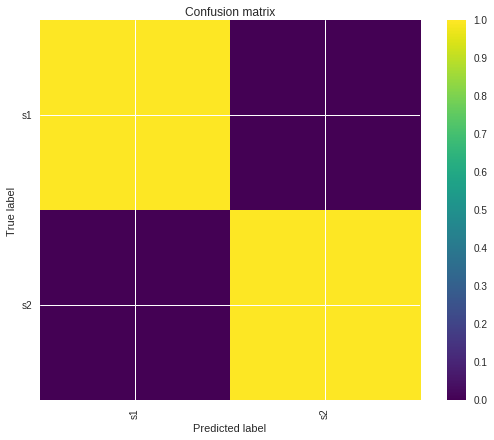

In [10]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8,6))
plot_confusion_matrix(cm_normalized)